# K-Means

O algoritmo de K-Means é um algoritmo de aprendizado não supervisionado que agrupa os dados considerando a distância dos dados em relação à um ponto chamado centroide. Os centróides são inicialmente defindos de forma aleatória e se ajustam durante o treinamento calculando a mediana dos dados, buscando assim encontrar o centroide que melhor diferencia os grupos entre sí.

Esse método depende que uma quantidade de grupos seja definida antes do treinamento, que pode ser determinada pelo método do cotovelo. Esse recurso permite encontrar o meio termo entre a quandidade de grupos diferentes da amostra e o tempo de treino do modelo.

**O que será abordado**
- Imports
- Dados de teste
- KMeans
- Treinamento do Modelo
- Visualização dos clusters

# Imports

In [2]:
# Import da biblioteca matplotlib -> Usada para demonstrar o método do cotovelo e os clusters obtidos pelo modelo
import matplotlib.pyplot as plt

# Import do dataset padrão para identificação de espécies de flores
from sklearn.datasets import load_iris

# Import da Classe KMeans -> Utilizada para criar o modelo K-means
from sklearn.cluster import KMeans

# Dados de teste

Nessa seção será apresentado o dataset utilizado para desenvolver o modelo de Gaussian Nayve Bayes que será criado nesse documento. Isso será feito através da criação de um dataframe Pandas que recebe um dataset padrão do scikit-learn.

In [3]:
# Obtém os dados do dataset na forma de um dataset
data = load_iris(as_frame=True).frame
data = data[['petal length (cm)', 'petal width (cm)']]
data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Explicação dos dados:    

O dataset final possui 2 colunas de Features que representam caracteristicas de um conjunto de plantas. Essas caracteristicas são:

- petal length (cm): Comprimento da Pétala medido em centimentros
- petal width (cm): Largura da Pétala medida em centimetros

# Método do cotovelo

O método do cotovelo é uma técnica que permite determinar quantos grupos diferentes podem ser encontrados na amostra, equilibrando o tempo de treino e a quantidade de clusters. Isso é feito realizado testes com um certo intervalo de grupos e analisando o resultado em cada um. Nesse cenário, assumimos que a quantidade ideal de grupos para treinar o modelo é aquela em que adicoinar novos clusters não altera significativamente a distancia entre os pontos e o centroide do grupo.

Veja abaixo uma aplicação desse método:

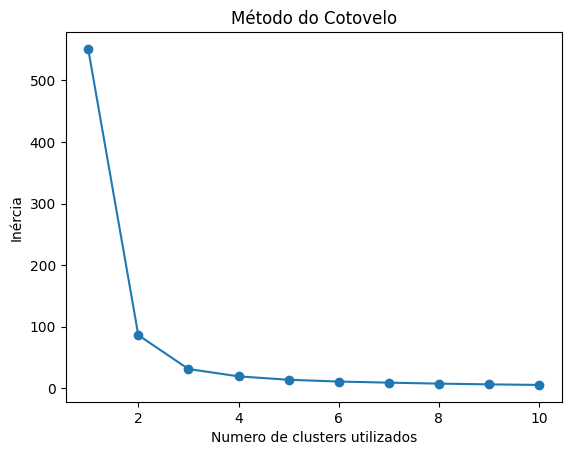

In [4]:
# Criação de uma lista para armazenar a inercia
inertia = [[], []]

# Criação de um laço de treinos -> O objetivo aqui é verificar a incercia de acordo com a quantidade de folds utilizados
for k in range(1, 11):
    # Cria o modelo com k clusters
    k_means = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    
    # Realiza o treino do modelo
    k_means.fit(data)
    
    # Armazena a inercia do treino
    inertia[0].append(k)    # Armazena numero de clusters utilizado no treino
    inertia[1].append(k_means.inertia_) # Armazeno a Inércia

# =-=-=-=-=-=-= Criação de um grafico para comparar a inércia com cada valor de k =-=-=-=-=-=-= #
plt.plot(inertia[0], inertia[1], marker = 'o')
plt.title('Método do Cotovelo')
plt.xlabel('Numero de clusters utilizados')
plt.ylabel('Inércia');

O grafico acima demonstra a inércia obtida para diferentes quantidades de clusters utilizados. Podemos notar que a partir de 3 clusters não existe mais uma variação significativa de inércia, isso é, a amostra utilizada possui 3 grupos suficientemente distintos entre sí.

# KMeans

Para criar um modelo de K-Means utilizando a biblioteca scikit-learn podemos utilizar a classe KMeans. Isso é feito com a seguinte sintaxe:

```py
nome_do_modelo = KMeans()
```

Veja um exemplo abaixo.

In [5]:
k_means = KMeans(n_clusters = 3, n_init = 10)

O código acima cria um modelo chamado k_means que implementa o método de K-means. A criação do modelo depende especialmente de 2 parametros:

- n_clsters = Quantidade de clusters que o modelo deve buscar, esse valor representa a quantidade de grupos diferentes que podem ser encontrados no conjunto de dados e pode ser determinado pelo método do cotovelo. Se nenhum valor for declarado o numero 8 é utilizado como padrão.

- n_init = Quantidade de vezes que o modelo deve ajustar os centroides para encontrar o melhor centroide para os clusters.

# Treinamento do modelo

O treinamento do modelo é realizado utilizando o método `.fit()` do modelo criado.

Esse método exige apenas 1 parametro.

- x = Dados de treino do modelo

In [6]:
k_means.fit(data)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


# Visualização dos Clusters

Com o modelo treinado podemos ralizar uma analise dos clusters encontrados pelo modelo para identificar quais são as caracteristicas de cada um deles. Isso pode ser feito por meio de uma análise estatistica dos clusters. Porém, com o objetivo de deixar esse documento mais didático utilizaremos uma análise grafica, aonde tentaremos por meio de uma analise visual tentar identificar os aspectos que podem ser utilizados para diferenciar os clusters sem a necessidade de se aprofundar em fundamentos estatisticos.

Veja abaixo como isso é feito:

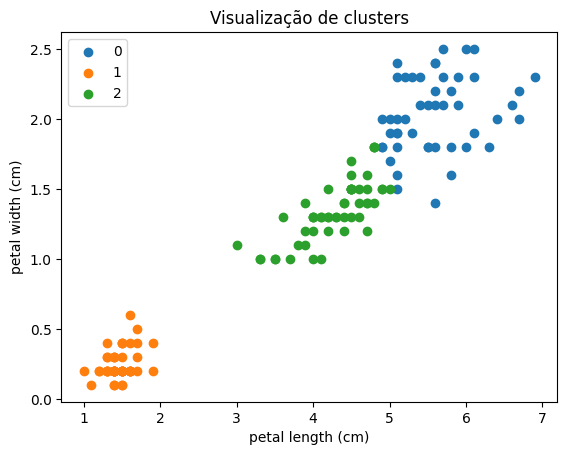

In [7]:
# Concatenação de dados e clusters
data['Cluster'] = k_means.labels_

# Ordena os dados de acordo com o numero do cluster
data = data.sort_values(by = 'Cluster')

# Exibe cada cluster inidvidualmente para atribuir o titulo corretamente
for cluster in data['Cluster'].unique():
    k_data = data.loc[data['Cluster'] == cluster]
    plt.scatter(k_data.iloc[:, 0], k_data.iloc[:, 1], label = cluster)
    plt.legend()

plt.title('Visualização de clusters')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');

O grafico acima exibe os clusters que foram obtidos com o modelo, permitindo a analise das caracteristicas de cada um. 

Nesse caso por exemlo podemos identificar uma distribuição que o cluster 0 se destaca por possuir petalas pequenas enquanto os grupos 1 e 2 se diferenciam entre si principalemnte pelo comprimento das petalas. Através dessa analise podemos deixar de ver essas flores como plantas diferentes e sem nenhuma relação entre sí e agrupa-las em espécies utilizando essas caracteristicas como critério, mesmo se não soubermos previamente a qual espécie pertencem.